### 정체구간 시간대별 비율

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel(r".\data\02+시간대별_2023_1.xlsx")

print(df.head())

  시/군/구    연도  월    노선          시종점  일시       시간  이용객수
0   가평군  2023  1  10-4  가평터미널-남이섬종점  주말  07시~08시    25
1   가평군  2023  1  10-4  가평터미널-남이섬종점  주말  08시~09시    18
2   가평군  2023  1  10-4  가평터미널-남이섬종점  주말  09시~10시    25
3   가평군  2023  1  10-4  가평터미널-남이섬종점  주말  10시~11시    40
4   가평군  2023  1  10-4  가평터미널-남이섬종점  주말  11시~12시    38


In [2]:
df.to_csv(r'.\data\bus_data.csv', index=False, encoding='utf-8-sig')

In [4]:
df_db = pd.read_csv(r'c:\Users\human-12\Downloads\suwon_2024.csv', encoding='utf-8-sig')
print(df_db.head())

df_db_na = df_db.isnull().sum()
print(df_db_na)

  시/군/구    연도  월 노선                    시종점  일시  이용객수  시작시간
0   수원시  2024  1  1  우만3단지.우만초교-호반마을광교21단지  주말     3     5
1   수원시  2024  1  1  우만3단지.우만초교-호반마을광교21단지  주말    91     6
2   수원시  2024  1  1  우만3단지.우만초교-호반마을광교21단지  주말   124     7
3   수원시  2024  1  1  우만3단지.우만초교-호반마을광교21단지  주말   233     8
4   수원시  2024  1  1  우만3단지.우만초교-호반마을광교21단지  주말   265     9
시/군/구    0
연도       0
월        0
노선       0
시종점      0
일시       0
이용객수     0
시작시간     0
dtype: int64


In [33]:
df_suwon = df[df["시/군/구"] == '수원시']
print(df_suwon.head(20))
print(df_suwon.shape)

       시/군/구    연도  월 노선                    시종점  일시       시간  이용객수
334258   수원시  2023  1  1  우만3단지.우만초교-호반마을광교21단지  주말  05시~06시     1
334259   수원시  2023  1  1  우만3단지.우만초교-호반마을광교21단지  주말  06시~07시    64
334260   수원시  2023  1  1  우만3단지.우만초교-호반마을광교21단지  주말  07시~08시   143
334261   수원시  2023  1  1  우만3단지.우만초교-호반마을광교21단지  주말  08시~09시   181
334262   수원시  2023  1  1  우만3단지.우만초교-호반마을광교21단지  주말  09시~10시   289
334263   수원시  2023  1  1  우만3단지.우만초교-호반마을광교21단지  주말  10시~11시   232
334264   수원시  2023  1  1  우만3단지.우만초교-호반마을광교21단지  주말  11시~12시   315
334265   수원시  2023  1  1  우만3단지.우만초교-호반마을광교21단지  주말  12시~13시   371
334266   수원시  2023  1  1  우만3단지.우만초교-호반마을광교21단지  주말  13시~14시   330
334267   수원시  2023  1  1  우만3단지.우만초교-호반마을광교21단지  주말  14시~15시   333
334268   수원시  2023  1  1  우만3단지.우만초교-호반마을광교21단지  주말  15시~16시   366
334269   수원시  2023  1  1  우만3단지.우만초교-호반마을광교21단지  주말  16시~17시   312
334270   수원시  2023  1  1  우만3단지.우만초교-호반마을광교21단지  주말  17시~18시   319
334271   수원시  2023  1  1  우만3단지.우만초교-호반마을광교21단지  주말  18시~19시  

C:\Users\human-12\AppData\Local\Temp\ipykernel_12996\3575434704.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suwon['시작시'] = df_suwon['시간'].str.extract(r'(\d+)시').astype(int)
C:\Users\human-12\AppData\Local\Temp\ipykernel_12996\3575434704.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


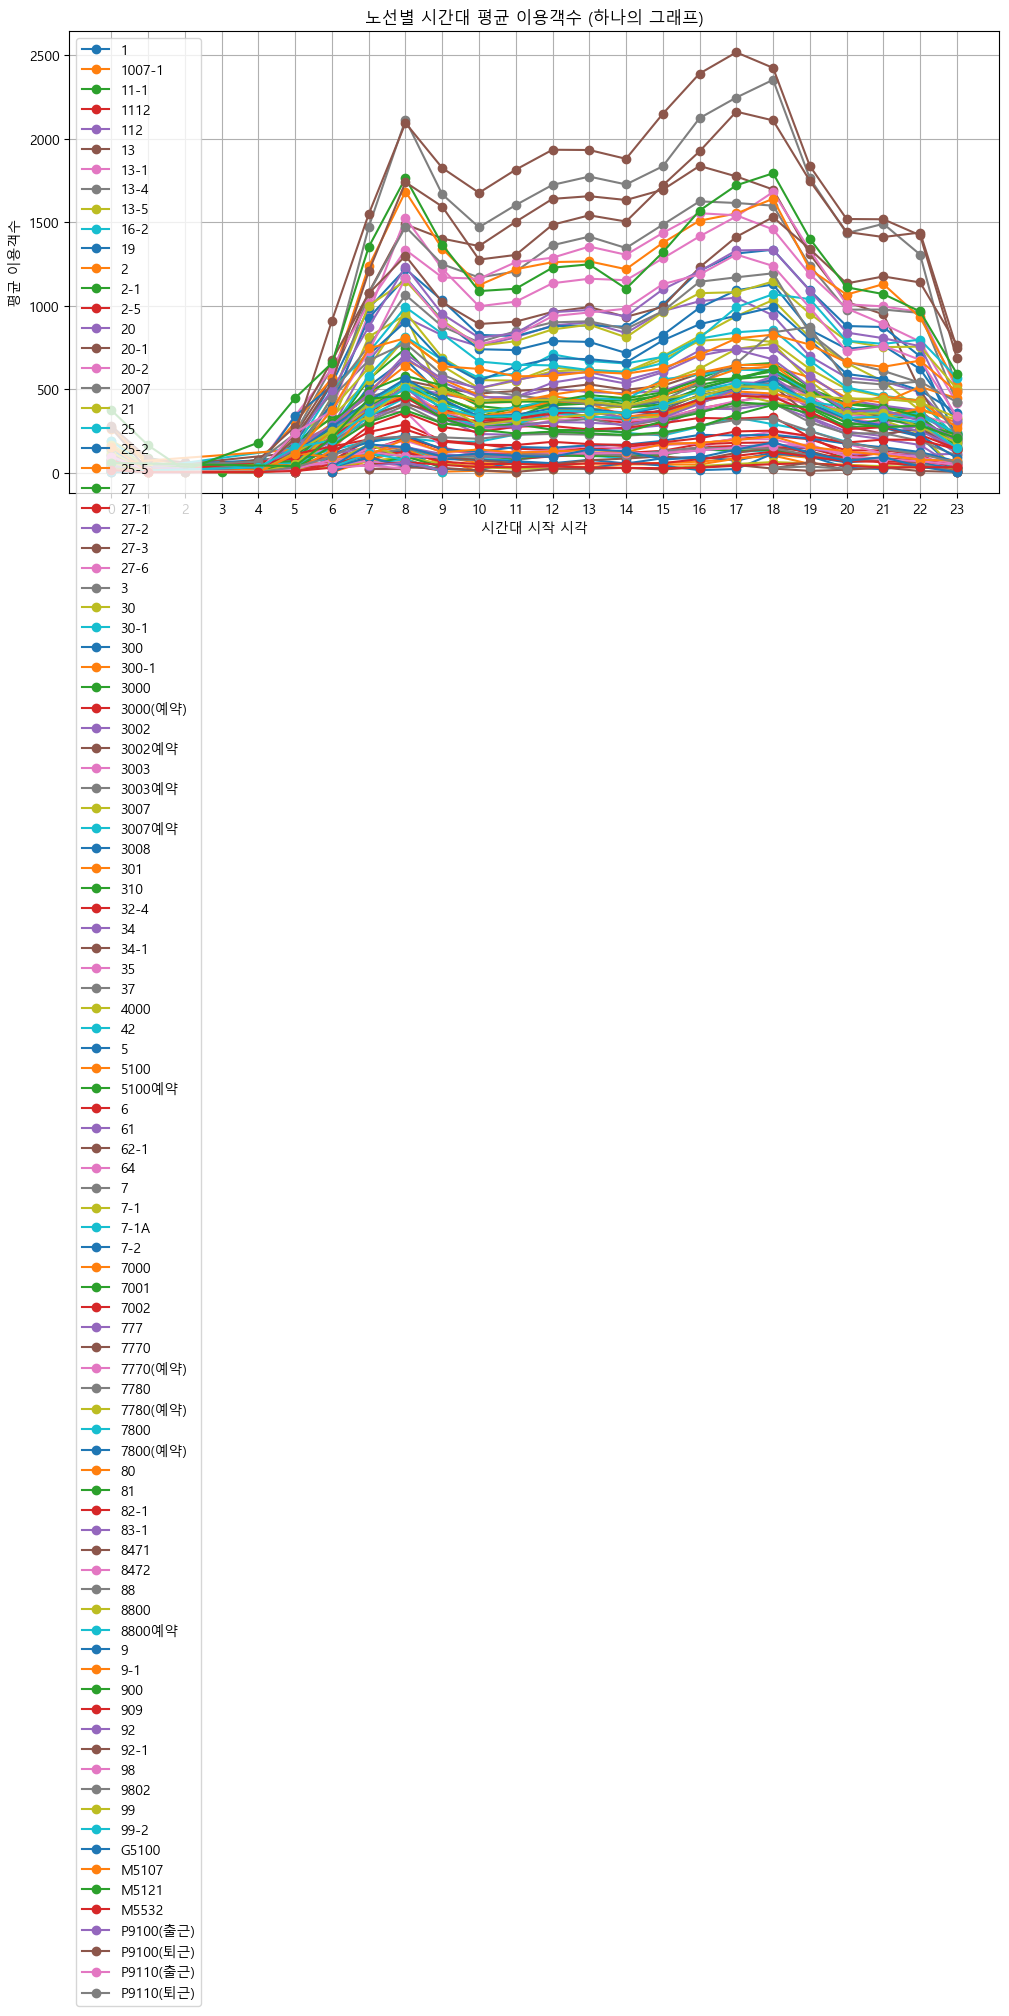

In [4]:
import matplotlib.pyplot as plt
import platform
import matplotlib


if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # 윈도우용
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:
    matplotlib.rcParams['font.family'] = 'NanumGothic'  # 설치되어 있어야 함

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

# 시간 문자열 정렬을 위해 '시작 시각' 숫자 컬럼 추가
df_suwon['시작시'] = df_suwon['시간'].str.extract(r'(\d+)시').astype(int)

# 노선 목록 추출
routes = df_suwon['노선'].unique()

# 시각화: 하나의 그래프에 모든 노선을 겹쳐서 그림
plt.figure(figsize=(12, 6))

for route in routes:
    df_route = df_suwon[df_suwon['노선'] == route]
    
    # 시간대별 평균 이용객수 계산
    df_avg = df_route.groupby('시작시')['이용객수'].mean().sort_index()
    
    # 그래프에 선 추가
    plt.plot(df_avg.index, df_avg.values, marker='o', label=route)

# 그래프 꾸미기
plt.title("노선별 시간대 평균 이용객수 (하나의 그래프)")
plt.xlabel("시간대 시작 시각")
plt.ylabel("평균 이용객수")
plt.xticks(range(df_suwon['시작시'].min(), df_suwon['시작시'].max() + 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
top_routes = df_suwon['노선'].value_counts().head(4).index.tolist()

NameError: name 'df_suwon' is not defined

In [14]:
df_na = df_suwon.isnull().sum()
print(df_suwon['노선'].value_counts())

노선
27           1904
2-1          1888
25           1870
25-2         1630
3000          563
             ... 
3007예약         27
5100예약         26
3002예약         24
P9110(출근)      22
P9110(퇴근)      19
Name: count, Length: 98, dtype: int64


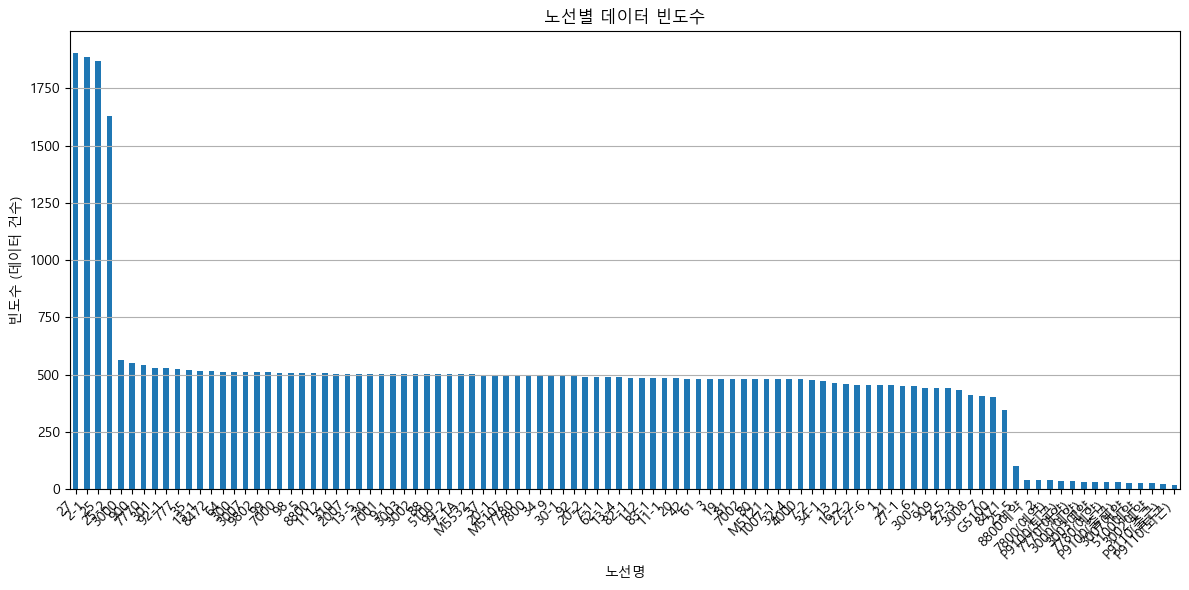

In [15]:
import matplotlib.pyplot as plt

# 노선별 등장 횟수 계산
route_counts = df_suwon['노선'].value_counts()

# 시각화
plt.figure(figsize=(12, 6))
route_counts.plot(kind='bar')

plt.title('노선별 데이터 빈도수')
plt.xlabel('노선명')
plt.ylabel('빈도수 (데이터 건수)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

In [13]:
df_line_sum = df_suwon.groupby('노선')['이용객수'].sum().reset_index()
print(df_line_sum.sort_values(by='이용객수', ascending=False).head(10))

      노선    이용객수
12   2-1  787196
55  62-1  778443
7   13-4  708964
85  92-1  657151
82   900  566919
5     13  563481
41   301  540567
27     3  523393
46    35  511115
6   13-1  493068


In [ ]:
df_line_uniq = df_suwon['노선'].unique()
print(df_line_uniq)

['1' '1007-1' '11-1' '1112' '112' '13' '13-1' '13-4' '13-5' '16-2' '19'
 '2' '2-1' '2-5' '20' '20-1' '20-2' '2007' '21' '25' '25-2' '25-5' '27'
 '27-1' '27-2' '27-3' '27-6' '3' '30' '30-1' '300' '300-1' '3000'
 '3000(예약)' '3002' '3002예약' '3003' '3003예약' '3007' '3007예약' '3008' '301'
 '310' '32-4' '34' '34-1' '35' '37' '4000' '42' '5' '5100' '5100예약' '6'
 '61' '62-1' '64' '7' '7-1' '7-1A' '7-2' '7000' '7001' '7002' '777' '7770'
 '7770(예약)' '7780' '7780(예약)' '7800' '7800(예약)' '80' '81' '82-1' '83-1'
 '8471' '8472' '88' '8800' '8800예약' '9' '9-1' '900' '909' '92' '92-1' '98'
 '9802' '99' '99-2' 'G5100' 'M5107' 'M5121' 'M5532' 'P9100(출근)'
 'P9100(퇴근)' 'P9110(출근)' 'P9110(퇴근)']


### 정체구간 지역별 비율

In [ ]:
df_region = pd.read_excel(r'C:\workspace\data\01. 지역별_2023.xlsx')
print(df_region.head())

     연도  시/도   시/군  평일_오전  평일_낮  평일_오후  주말_오전  주말_낮  주말_오후
0  2023  경기도   수원시   21.9  17.8   34.2    8.2  16.4   12.3
1  2023  경기도   성남시    2.3   0.0   11.4    0.0   4.5    2.3
2  2023  경기도  의정부시   16.0  12.0   20.0    0.0  12.0    8.0
3  2023  경기도   안양시   15.4   3.8   26.9    0.0   7.7    3.8
4  2023  경기도   부천시   45.5  25.2   25.0    0.0  23.0    0.0


c:\workspace\.venv\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [10]:
df_region_suwon = df_region[df_region['시/군'] == '수원시']
print(df_region_suwon.head())

     연도  시/도  시/군  평일_오전  평일_낮  평일_오후  주말_오전  주말_낮  주말_오후
0  2023  경기도  수원시   21.9  17.8   34.2    8.2  16.4   12.3


### 교통사고 통계

In [ ]:
df_action = pd.read_excel(r'.\data\01 돌발상황 통계_2023.xlsx')
print(df_action.head())
print(df_action.shape)

c:\workspace\.venv\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


     연도  월  일  돌발유형    돌발상세       도로명  방향           구간 발생차로 통제차로  \
0  2023  1  1    사고    차량사고    중부고속도로  대전    산곡JC-광주IC  1|2  1|2   
1  2023  1  1    사고    차량사고     분당수서로  서울   벌말사거리-탄천IC    1    1   
2  2023  1  1    사고    차량사고  평택제천고속도로  평택  북진천IC-남안성IC    2    2   
3  2023  1  1    사고    차량사고    경부고속도로  부산    동탄JC-오산IC    2    2   
4  2023  1  1  차량고장  기상관련사고   서해안고속도로  서울    팔곡JC-안산JC    1    1   

               발행일시  종료일시 심각도         위도          경도  건수     상세내용  
0  2023-01-01 01:49  -- :   상  37.476549  127.245707   1    승용차사고  
1  2023-01-01 03:18  -- :   상  37.430749  127.121479   1  승용차단독사고  
2  2023-01-01 06:01  -- :   상  36.974435  127.367814   1    승용차사고  
3  2023-01-01 13:51  -- :   상  37.159889  127.088440   1    차량 사고  
4  2023-01-01 18:20  -- :   상  37.334619  126.875806   1       고장  
(15148, 17)


### 정체구간 호선별 비율

In [ ]:
df_line = pd.read_excel(r'.\data\02. 호선별_2023.xlsx')
print(df_line.head())
print(df_line.shape)
print(df_line.tail())
print(df_line['A_SECTIONNAME'].unique())

  A_SECTIONNAME A_LINENAME    연도  DELAYRATE2023
0           NaN        NaN  2023            0.0
1          고속국도     경부고속도로  2023           19.9
2          고속국도     경인고속도로  2023           22.4
3          고속국도    서해안고속도로  2023            4.7
4          고속국도     영동고속도로  2023            2.3
(103, 4)
    A_SECTIONNAME  A_LINENAME    연도  DELAYRATE2023
98            시군도        동부대로  2023            6.7
99            시군도       동탄기흥로  2023           30.1
100           시군도  태릉구리간고속화도로  2023            0.0
101           시군도   덕송내각고속화도로  2023            0.0
102           시군도       비봉매송로  2023            0.0
[nan '고속국도' '일반국도' '국가지원지방도' '지방도' '시군도']


c:\workspace\.venv\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


### 정류소간 버스 이용객 수

In [9]:
df_station = pd.read_excel(r'.\data\01_정류소간 버스 이용객수_2023.xlsx')
print(df_station.head())
print(df_station.shape)

c:\suwon\venv\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


    기점   종점    연도  월  일시    수단  이용객수
0  가평군  가평군  2023  1  평일  일반버스  1807
1  가평군  가평군  2023  1  평일  좌석버스   211
2  가평군  가평군  2023  1  주말  일반버스  1586
3  가평군  가평군  2023  1  주말  좌석버스   279
4  가평군  가평군  2023  2  평일  일반버스  1757
(37586, 7)


In [12]:
df_station_suwon = df_station[(df_station['기점'] == '수원시') | (df_station['종점'] == '수원시')]
print(df_station_suwon.head())
print(df_station_suwon.shape)

      기점   종점    연도  월  일시    수단  이용객수
839  강남구  수원시  2023  1  평일  좌석버스    98
840  강남구  수원시  2023  1  주말  좌석버스    83
841  강남구  수원시  2023  2  평일  좌석버스    88
842  강남구  수원시  2023  2  주말  좌석버스   103
843  강남구  수원시  2023  3  평일  좌석버스   103
(2064, 7)


## api 정보 불러오기

노선번호 데이터를 기준으로
+ 노선정보 데이터 추가
+ 노선별 시작점- 중간 정류장들 -종점


### 노선번호항목 조회

In [ ]:
from pprint import pprint
import requests
import pandas as pd
from IPython.display import display

# 서비스 키 및 기본 URL
service_key = "kUl3en8acwwXTg5Tf9hPfvaN9c8glfXy3fKLTW287glz8vWkRwbRH6wVEU90ec56v5lJGKFiqEByIqAMQyFHQA=="
url = "http://apis.data.go.kr/1613000/BusRouteInfoInqireService/getRouteNoList"

# 기본 파라미터
city_code = "31010" # 수원시 도시코드
num_of_rows = 100  # 한 페이지당 불러올 데이터 수
page = 1

# 전체 데이터를 담을 리스트
all_items = []

# 1. 우선 첫 페이지 호출 → totalCount 확인
params = {
    "serviceKey": service_key,
    "_type": "json",
    "cityCode": city_code,
    "numOfRows": num_of_rows,
    "pageNo": page
}
response = requests.get(url, params=params)
json_data = response.json()
total_count = json_data['response']['body']['totalCount']
print("전체 노선 수:", total_count)

# 2. 전체 페이지 수 계산
total_pages = (total_count // num_of_rows) + (1 if total_count % num_of_rows > 0 else 0)
print("총 페이지 수:", total_pages)

# 3. 반복 요청하여 전체 데이터 수집
for page in range(1, total_pages + 1):
    params['pageNo'] = page
    response = requests.get(url, params=params)
    json_data = response.json()
    
    # 예외 처리: 데이터가 없는 경우
    try:
        items = json_data['response']['body']['items']['item']
        if isinstance(items, dict):  # 단일 항목인 경우 리스트로 변환
            items = [items]
        all_items.extend(items)
    except KeyError:
        print(f"{page}페이지에 데이터 없음")

# 4. DataFrame으로 변환
df_all = pd.DataFrame(all_items)
display(df_all)


전체 노선 수: 95
총 페이지 수: 1


,endnodenm,endvehicletime,routeid,routeno,routetp,startnodenm,startvehicletime
0,사당역(중),0100,GGB233000031,7770,직행좌석버스,서둔동차고지대기(미정차),0430
1,사당역(중),NaN,GGB233000032,7780,직행좌석버스,호매실동차고지,0500
2,수원대학교,2245,GGB233000083,30,일반버스,이목동차고지.이목동입구,0450
3,봉담읍행정복지센터,2300,GGB233000087,42,일반버스,이목동차고지.이목동입구,0500
4,경진여객차고지,2300,GGB233000271,9802,직행좌석버스,서둔동차고지대기(미정차),0500
...,...,...,...,...,...,...,...
90,강남역나라빌딩앞,0750,GGB200000326,M5443(예약),광역급행버스,서부공용차고지(미정차),0620
91,사당역3번출구,2300,GGB200000327,수원MDRT,직행좌석버스,당수지구A-2BL,0640
92,백석역.고양종합터미널,2200,GGB200000328,8450,직행좌석버스,수원버스터미널,0520
93,고색역.고색초교.태산아파트,NaN,GGB200000329,수원똑버스02,NaN,고색역.고색초교.태산아파트,0600


['GGB233000031', 'GGB233000032', 'GGB233000083', 'GGB233000087', 'GGB233000271', 'GGB233000272', 'GGB233000273', 'GGB234001286', 'GGB234001317', 'GGB234001318']


In [ ]:
# 5. routeid 담을 배열 생성
routeid_list = df_all['routeid'].tolist()
print(routeid_list[:10])  # 처음 10개 routeid 출력

In [33]:
# 6. routeno 담을 배열 생성
routeno_list = df_all['routeno'].tolist()
print(routeno_list[:10])  # 처음 10개 routeno 출력

[7770, 7780, 30, 42, 9802, 8472, 8471, 'M5115', 'M5121', 'M5422']


In [ ]:
# num = len(df_suwon['노선'].unique())

# print(num)

98


### 노선정보항목 조회

In [ ]:
import requests
import pandas as pd
import time  # 과도한 요청 방지용

# 서비스 키 및 기본 파라미터
service_key = "kUl3en8acwwXTg5Tf9hPfvaN9c8glfXy3fKLTW287glz8vWkRwbRH6wVEU90ec56v5lJGKFiqEByIqAMQyFHQA=="
url = 'http://apis.data.go.kr/1613000/BusRouteInfoInqireService/getRouteInfoIem'

# 결과 저장 리스트
all_items = []

for route_id in routeid_list:
    params = {
        'serviceKey': service_key,
        '_type': 'json',
        'cityCode': "31010",     # 수원시 코드
        'routeId': route_id
    }

    try:
        response = requests.get(url, params=params)
        data = response.json()

        # 안전하게 item 추출
        items = data.get('response', {}).get('body', {}).get('items', {}).get('item', None)

        # 단일 dict인 경우 리스트로 변환
        if isinstance(items, dict):
            items = [items]

        # None이 아니면 누적
        if items:
            all_items.extend(items)

    except Exception as e:
        print(f"routeId {route_id} 요청 실패: {e}")
    
    # 과도한 요청 방지
    time.sleep(0.1)

# DataFrame 변환
df_routeinfo = pd.DataFrame(all_items)

# 결과 출력
print(f"수집된 노선 수: {len(df_routeinfo)}")
display(df_routeinfo.head())

수집된 노선 수: 95


,endnodenm,endvehicletime,intervalsattime,intervalsuntime,intervaltime,routeid,routeno,routetp,startnodenm,startvehicletime
0,사당역(중),0100,9.0,9.0,4.0,GGB233000031,7770,직행좌석버스,서둔동차고지대기(미정차),0430
1,사당역(중),NaN,15.0,15.0,2.0,GGB233000032,7780,직행좌석버스,호매실동차고지,0500
2,수원대학교,2245,50.0,50.0,25.0,GGB233000083,30,일반버스,이목동차고지.이목동입구,0450
3,봉담읍행정복지센터,2300,30.0,30.0,17.0,GGB233000087,42,일반버스,이목동차고지.이목동입구,0500
4,경진여객차고지,2300,33.0,33.0,27.0,GGB233000271,9802,직행좌석버스,서둔동차고지대기(미정차),0500


In [24]:
print(df_routeinfo.shape)

(95, 10)


### 노선별 경유 정류장 조회

In [39]:
import requests
import pandas as pd
from tqdm import tqdm

# API 설정
service_key = "kUl3en8acwwXTg5Tf9hPfvaN9c8glfXy3fKLTW287glz8vWkRwbRH6wVEU90ec56v5lJGKFiqEByIqAMQyFHQA==" 
city_code = "31010"  # 수원시

# 결과 저장용 리스트
all_station_data = []

# 순회 시작
for route_id in tqdm(routeid_list):
    url = 'http://apis.data.go.kr/1613000/BusRouteInfoInqireService/getRouteAcctoThrghSttnList'
    params = {
        'serviceKey': service_key,
        '_type': 'json',
        'numOfRows': 1000,  # 한 번에 가져올 데이터 수
        'cityCode': city_code,
        'routeId': route_id
    }

    try:
        res = requests.get(url, params=params)
        res.raise_for_status()  # HTTP 에러 발생 시 예외 발생

        data = res.json()
        items = data['response']['body']['items'].get('item', [])

        if isinstance(items, dict):  # 단일 정류장일 경우 리스트로 변환
            items = [items]

        for item in items:
            all_station_data.append({
                'routeid': route_id,
                'nodeord': item.get('nodeord'),
                'nodenm': item.get('nodenm'),
                'gpslati': item.get('gpslati'),
                'gpslong': item.get('gpslong'),
                'nodeid': item.get('nodeid')
            })

    except Exception as e:
        print(f"Error for routeId {route_id}: {e}")
        continue

# DataFrame으로 변환
df_stations = pd.DataFrame(all_station_data).sort_values(['routeid', 'nodeord']).reset_index(drop=True)

# 결과 확인
print(f"수집된 정류장 정보 수: {len(df_stations)}")
display(df_stations.head())

# df_stations.to_csv(r'.\data\bus_stations.csv', index=False, encoding='utf-8-sig')

100%|██████████| 95/95 [00:19<00:00,  4.99it/s]

수집된 정류장 정보 수: 8011


,routeid,nodeord,nodenm,gpslati,gpslong,nodeid
0,GGB200000006,1,수월암리공단,37.118583,127.024800,GGB214001355
1,GGB200000006,2,수월암2리입구,37.115500,127.030883,GGB214000161
2,GGB200000006,3,서탄면사무소,37.107183,127.034967,GGB214000294
3,GGB200000006,4,금암1리,37.104133,127.041933,GGB214000292
4,GGB200000006,5,하북3리,37.103917,127.057000,GGB214000290


In [35]:
grouped = df_stations.groupby('routeid')

grouped_json = {}

for route_id, group in grouped:
    grouped_json[route_id] = {
        'gpslati': group['gpslati'].tolist(),
        'gpslong': group['gpslong'].tolist(),
        'nodeid': group['nodeid'].tolist(),
        'nodenm': group['nodenm'].tolist(),
        'nodeord': group['nodeord'].tolist()
    }

print(grouped_json)
display(grouped_json)

{'GGB200000006': {'gpslati': [37.1185833, 37.1155, 37.1071833, 37.1041333, 37.1039167, 37.1041167, 37.1091667, 37.11395, 37.1176833, 37.1222333, 37.1301333, 37.13285, 37.1366, 37.1398, 37.1444333, 37.14985, 37.1513833, 37.1539667, 37.1577167, 37.1614667, 37.16365, 37.1692, 37.1728167, 37.1772667, 37.1807, 37.1839333, 37.18605, 37.1907667, 37.1959, 37.2037833, 37.2087167, 37.2106667, 37.22145, 37.22765, 37.2333333, 37.2363333, 37.2428833, 37.24905, 37.25095, 37.2529833, 37.2557667, 37.2589833, 37.26225, 37.2646, 37.2694167, 37.2726667, 37.27575, 37.28045, 37.2866667, 37.2920833, 37.2965333, 37.2984333, 37.3010667, 37.30345, 37.3058333, 37.3070667, 37.3081333, 37.30945, 37.3115667, 37.3187667, 37.32525, 37.33055, 37.3360333, 37.3413667, 37.3439833, 37.3463, 37.3485, 37.3502333, 37.3534, 37.3568167, 37.3606833, 37.3627833, 37.3672333, 37.3716667, 37.3740333, 37.37755, 37.37935, 37.3819667, 37.3858167, 37.3885333, 37.3903, 37.3883167, 37.3845833, 37.3820167, 37.3787167, 37.3773167, 37.3733

{'GGB200000006': {'gpslati': [37.1185833,
   37.1155,
   37.1071833,
   37.1041333,
   37.1039167,
   37.1041167,
   37.1091667,
   37.11395,
   37.1176833,
   37.1222333,
   37.1301333,
   37.13285,
   37.1366,
   37.1398,
   37.1444333,
   37.14985,
   37.1513833,
   37.1539667,
   37.1577167,
   37.1614667,
   37.16365,
   37.1692,
   37.1728167,
   37.1772667,
   37.1807,
   37.1839333,
   37.18605,
   37.1907667,
   37.1959,
   37.2037833,
   37.2087167,
   37.2106667,
   37.22145,
   37.22765,
   37.2333333,
   37.2363333,
   37.2428833,
   37.24905,
   37.25095,
   37.2529833,
   37.2557667,
   37.2589833,
   37.26225,
   37.2646,
   37.2694167,
   37.2726667,
   37.27575,
   37.28045,
   37.2866667,
   37.2920833,
   37.2965333,
   37.2984333,
   37.3010667,
   37.30345,
   37.3058333,
   37.3070667,
   37.3081333,
   37.30945,
   37.3115667,
   37.3187667,
   37.32525,
   37.33055,
   37.3360333,
   37.3413667,
   37.3439833,
   37.3463,
   37.3485,
   37.3502333,
   37.3534,


In [15]:
import pandas as pd

items = json_data['response']['body']['items']['item']
df = pd.DataFrame(items)

# nodeord 기준으로 정렬
df = df.sort_values('nodeord').reset_index(drop=True)

# 결과 확인
# print(df[['routeid', 'nodeord', 'nodenm', 'gpslati', 'gpslong']])
print(df.head())
print(df.shape)

# columns = ['routeid', 'nodeord', 'nodenm', 'gpslati', 'gpslong']
# df_group = df.groupby('routeid')[columns]
# print(df_group.head(30))

     gpslati     gpslong        nodeid         nodenm  nodeord       routeid  \
0  37.271800  126.995433  GGB277103108  서둔동차고지대기(미정차)        1  GGB233000007   
1  37.273833  126.994833  GGB277103109     차고지출발(미정차)        2  GGB233000007   
2  37.270667  126.994200  GGB277101594     서둔교차로(미정차)        3  GGB233000007   
3  37.267367  127.000883  GGB202000106      수원역.AK플라자        4  GGB233000007   
4  37.271217  127.001067  GGB202000223        고등동구터미널        5  GGB233000007   

   nodeno  
0     NaN  
1     NaN  
2     NaN  
3  3195.0  
4  3020.0  
(10, 7)


### 도시코드목록 조회

In [2]:
# 도시코드 목록 조회
from pprint import pprint
import requests

service_key = "kUl3en8acwwXTg5Tf9hPfvaN9c8glfXy3fKLTW287glz8vWkRwbRH6wVEU90ec56v5lJGKFiqEByIqAMQyFHQA=="

url = 'http://apis.data.go.kr/1613000/BusRouteInfoInqireService/getCtyCodeList'
params = {
    'serviceKey': service_key,
    '_type': 'json',
    'cityCode': '31010',
    'routeId': 'GGB233000007',
}
response = requests.get(url, params=params)
# content(바이트) → decode("utf-8")로 한글 변환
decoded = response.content.decode("utf-8")
display(JSON(decoded, expanded=True))

<IPython.core.display.JSON object>

- df_all : 노선 목록 담은 DataFrame
- df_routeinfo : 노선 정보 DataFrame(+ 노선별 배차간격(평,토,일))
- df_stations : 정류장 정보 DataFrame(+ 노선별 중간정류장 리스트)

In [ ]:
print(df_all.head())
df_id_no = df_all[['routeid', 'routeno']]
# print(df_id_no.head())

   endnodenm endvehicletime       routeid routeno routetp    startnodenm  \
0     사당역(중)           0100  GGB233000031    7770  직행좌석버스  서둔동차고지대기(미정차)   
1     사당역(중)            NaN  GGB233000032    7780  직행좌석버스        호매실동차고지   
2      수원대학교           2245  GGB233000083      30    일반버스   이목동차고지.이목동입구   
3  봉담읍행정복지센터           2300  GGB233000087      42    일반버스   이목동차고지.이목동입구   
4    경진여객차고지           2300  GGB233000271    9802  직행좌석버스  서둔동차고지대기(미정차)   

  startvehicletime  
0             0430  
1             0500  
2             0450  
3             0500  
4             0500  
        routeid routeno
0  GGB233000031    7770
1  GGB233000032    7780
2  GGB233000083      30
3  GGB233000087      42
4  GGB233000271    9802


In [28]:
print(df_routeinfo.head())

   endnodenm endvehicletime  intervalsattime  intervalsuntime  intervaltime  \
0     사당역(중)           0100              9.0              9.0           4.0   
1     사당역(중)            NaN             15.0             15.0           2.0   
2      수원대학교           2245             50.0             50.0          25.0   
3  봉담읍행정복지센터           2300             30.0             30.0          17.0   
4    경진여객차고지           2300             33.0             33.0          27.0   

        routeid routeno routetp    startnodenm startvehicletime  
0  GGB233000031    7770  직행좌석버스  서둔동차고지대기(미정차)             0430  
1  GGB233000032    7780  직행좌석버스        호매실동차고지             0500  
2  GGB233000083      30    일반버스   이목동차고지.이목동입구             0450  
3  GGB233000087      42    일반버스   이목동차고지.이목동입구             0500  
4  GGB233000271    9802  직행좌석버스  서둔동차고지대기(미정차)             0500  


In [ ]:
print(df_stations.head())

        routeid  nodeord   nodenm    gpslati     gpslong        nodeid
0  GGB200000006        1   수월암리공단  37.118583  127.024800  GGB214001355
1  GGB200000006        2  수월암2리입구  37.115500  127.030883  GGB214000161
2  GGB200000006        3   서탄면사무소  37.107183  127.034967  GGB214000294
3  GGB200000006        4     금암1리  37.104133  127.041933  GGB214000292
4  GGB200000006        5     하북3리  37.103917  127.057000  GGB214000290


In [45]:
df_join = df_stations.merge(
    df_id_no[['routeid', 'routeno']],  # 필요한 컬럼만 선택
    how='left',                        # 정류장 정보를 기준으로 유지
    on='routeid'                       # 공통 컬럼: routeid
)

print(df_join.tail(20))

           routeid  nodeord               nodenm    gpslati     gpslong  \
7991  GGB234001318       28           서초문화예술정보학교  37.488067  127.032017   
7992  GGB234001318       29              양재역커피빈앞  37.482883  127.035333   
7993  GGB234001318       30      교육개발원입구교차로(미정차)  37.477750  127.038400   
7994  GGB234001318       31         매헌시민의숲.양재꽃시장  37.470800  127.038383   
7995  GGB234001318       32            염곡IC(미정차)  37.460217  127.052133   
7996  GGB234001318       33            내곡IC(미정차)  37.458317  127.074983   
7997  GGB234001318       34            헌릉IC(미정차)  37.465517  127.090667   
7998  GGB234001318       35            고등IC(미정차)  37.425917  127.090300   
7999  GGB234001318       36           서판교IC(미정차)  37.388750  127.069917   
8000  GGB234001318       37           서분당IC(미정차)  37.361433  127.062633   
8001  GGB234001318       38           서수지IC(미정차)  37.324817  127.056217   
8002  GGB234001318       39          광교로삼거리(미정차)  37.305567  127.051500   
8003  GGB234001318       

In [46]:
df_join = df_join.merge(
    df_routeinfo[['routeid', 'intervalsattime', 'intervalsuntime', 'intervaltime']],
    how='left',
    on='routeid'
)

print(df_join.head())

        routeid  nodeord   nodenm    gpslati     gpslong        nodeid  \
0  GGB200000006        1   수월암리공단  37.118583  127.024800  GGB214001355   
1  GGB200000006        2  수월암2리입구  37.115500  127.030883  GGB214000161   
2  GGB200000006        3   서탄면사무소  37.107183  127.034967  GGB214000294   
3  GGB200000006        4     금암1리  37.104133  127.041933  GGB214000292   
4  GGB200000006        5     하북3리  37.103917  127.057000  GGB214000290   

  routeno  intervalsattime  intervalsuntime  intervaltime  
0     300             17.0             17.0          10.0  
1     300             17.0             17.0          10.0  
2     300             17.0             17.0          10.0  
3     300             17.0             17.0          10.0  
4     300             17.0             17.0          10.0  


In [47]:
grouped = df_join.groupby('routeid')

grouped_json = {}

for route_id, group in grouped:
    grouped_json[route_id] = {
        'routeno': group['routeno'].iloc[0],
        'intervalsattime': group['intervalsattime'].iloc[0],
        'intervalsuntime': group['intervalsuntime'].iloc[0],
        'intervaltime': group['intervaltime'].iloc[0],
        'gpslati': group['gpslati'].tolist(),
        'gpslong': group['gpslong'].tolist(),
        'nodeid': group['nodeid'].tolist(),
        'nodenm': group['nodenm'].tolist(),
        'nodeord': group['nodeord'].tolist()
    }

# 출력
import json
print(json.dumps(grouped_json, ensure_ascii=False, indent=2))  # 한글 깨짐 없이 보기 좋게 출력


{
  "GGB200000006": {
    "routeno": 300,
    "intervalsattime": 17.0,
    "intervalsuntime": 17.0,
    "intervaltime": 10.0,
    "gpslati": [
      37.1185833,
      37.1155,
      37.1071833,
      37.1041333,
      37.1039167,
      37.1041167,
      37.1091667,
      37.11395,
      37.1176833,
      37.1222333,
      37.1301333,
      37.13285,
      37.1366,
      37.1398,
      37.1444333,
      37.14985,
      37.1513833,
      37.1539667,
      37.1577167,
      37.1614667,
      37.16365,
      37.1692,
      37.1728167,
      37.1772667,
      37.1807,
      37.1839333,
      37.18605,
      37.1907667,
      37.1959,
      37.2037833,
      37.2087167,
      37.2106667,
      37.22145,
      37.22765,
      37.2333333,
      37.2363333,
      37.2428833,
      37.24905,
      37.25095,
      37.2529833,
      37.2557667,
      37.2589833,
      37.26225,
      37.2646,
      37.2694167,
      37.2726667,
      37.27575,
      37.28045,
      37.2866667,
      37.2920833,
  

In [48]:
import json

with open('bus_route_info.json', 'w', encoding='utf-8') as f:
    json.dump(grouped_json, f, ensure_ascii=False, indent=2)


In [ ]:
df_join_na = df_join.isnull().sum()
# print(df_join_na)
print(df_join.head())

routeid              0
nodeord              0
nodenm               0
gpslati              0
gpslong              0
nodeid               0
routeno              0
intervalsattime    285
intervalsuntime    285
intervaltime         2
dtype: int64
        routeid  nodeord   nodenm    gpslati     gpslong        nodeid  \
0  GGB200000006        1   수월암리공단  37.118583  127.024800  GGB214001355   
1  GGB200000006        2  수월암2리입구  37.115500  127.030883  GGB214000161   
2  GGB200000006        3   서탄면사무소  37.107183  127.034967  GGB214000294   
3  GGB200000006        4     금암1리  37.104133  127.041933  GGB214000292   
4  GGB200000006        5     하북3리  37.103917  127.057000  GGB214000290   

  routeno  intervalsattime  intervalsuntime  intervaltime  
0     300             17.0             17.0          10.0  
1     300             17.0             17.0          10.0  
2     300             17.0             17.0          10.0  
3     300             17.0             17.0          10.0  
4     300   

총 통합된 버스 노선 데이터(정류장, 배차간격(결측치 포함) 까지)
- data 폴더 내 bus_joined_data.csv

In [51]:
df_join.to_csv(r'.\data\bus_joined_data.csv', index=False, encoding='utf-8-sig')